# Notebook for creating custom plots

In [2]:
# First we import the neccesary libraries the we are going to use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import getcwd

# Defining a function for creating a single custom plot

In [5]:
def plot_function(x, y, **kwargs):
    title  = kwargs.pop( 'title'  )
    xlabel = kwargs.pop( 'xlabel' )
    ylabel = kwargs.pop( 'ylabel' )
    marker = kwargs.pop( 'marker' )
    '''defaul values for marker size, figure size, font size and legend'''
    marker_size = 4
    fig_size = (8,6)
    font_size = 12
    legend_location = 'upper right'
    if kwargs.get( 'figure_size' ) is not None:
        fig_size = kwargs.pop( 'figure_size' )
    if kwargs.get( 'marker_size' )  is not None:
        marker_size = kwargs.pop( 'marker_size' )
    if kwargs.get( 'font_size' ) is not None:
        font_size = kwargs.pop( 'font_size')
    if kwargs.get( 'legend_location' ) is not None:
        legend_location=str(kwargs.pop( 'legend_location'))
    plt.rcParams['font.size'] = font_size
    plt.figure(figsize=fig_size)
    plt.plot(x, y, marker,markersize=marker_size, label=title)
    plt.legend(loc=legend_location)
    fig = plt.gcf()
    for axis in fig.axes:
        axis.xaxis.set_label_text( xlabel )
        axis.yaxis.set_label_text( ylabel )
    if kwargs.get( 'x_limits' )is not None:
        plt.xlim(kwargs.pop( 'x_limits'))
    if kwargs.get( 'y_limits' )is not None:
        plt.ylim(kwargs.pop( 'y_limits'))
    if kwargs.get( 'save_figure' )is not None:
        if kwargs.pop( 'save_figure' ) == 'yes':
            figure_name = 'figure_plot'
            if kwargs.get( 'figure_name') is not None:
                figure_name = kwargs.pop( 'figure_name' )
            fig.savefig(getcwd()+'/Pictures/'+figure_name+'.pdf', format='pdf',transparent=False,bbox_inches="tight", dpi=1400)
    return axis

Example of how to use the function mention above

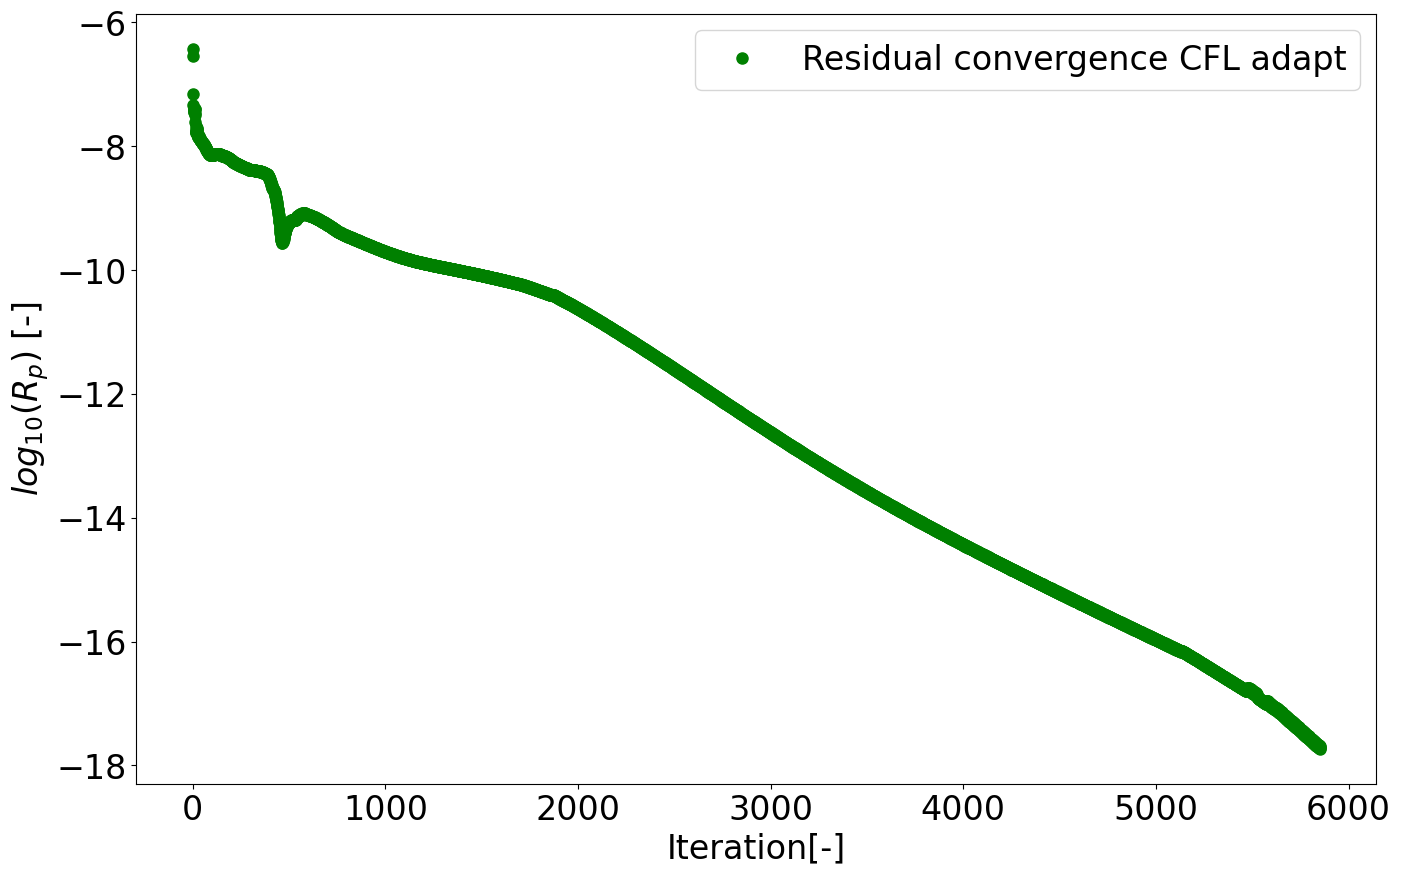

In [8]:
path=getcwd()+"/codes/TestCases/species_transport/preconditioning/dev_precon_comparison/"
x=pd.read_csv(path+"preconditioning/CFL_ADAPT/history.csv", usecols=["Inner_Iter"]).values
y=pd.read_csv(path+"preconditioning/CFL_ADAPT/history.csv", usecols=['     "rms[P]"     ']).values
y_axis="$log_{10}(R_{p})$ [-]"
plot_conf = {'title': "Residual convergence CFL adapt", 'xlabel':'Iteration[-]', 'ylabel': y_axis,\
             'marker': 'go', 'marker_size': 8, 'figure_size': (16,10), 'font_size': 24,\
            'save_figure':'yes'}
axis=plot_function(x,y,**plot_conf)

# Creating multiple plots simultaneously

In [11]:
def loop_plot(plots,**kwargs):
    xlabel = kwargs.pop( 'xlabel' )
    ylabel = kwargs.pop( 'ylabel' )
    '''defaul values for marker size, figure size, font size and legend'''
    marker_size = 4
    fig_size = (8,6)
    font_size = 12
    legend_location = 'upper right'
    if kwargs.get( 'figure_size' ) is not None:
        fig_size = kwargs.pop( 'figure_size' )
    if kwargs.get( 'marker_size' )  is not None:
        marker_size = kwargs.pop( 'marker_size' )
    if kwargs.get( 'font_size' ) is not None:
        font_size = kwargs.pop( 'font_size')
    if kwargs.get( 'legend_location' ) is not None:
        legend_location=str(kwargs.pop( 'legend_location'))
    plt.figure(figsize=fig_size)
    plt.rcParams['font.size'] = str(font_size)
    for plot in tuple(plots):
        tuple(plot[0])
        plt.plot(plot[0], plot[1], plot[2],markersize=marker_size, label=plot[3])
        plt.legend(loc=legend_location)
    fig = plt.gcf()
    for axis in fig.axes:
        axis.xaxis.set_label_text( xlabel )
        axis.yaxis.set_label_text( ylabel )
    if kwargs.get( 'x_limits' )is not None:
        plt.xlim(kwargs.pop( 'x_limits'))
    if kwargs.get( 'y_limits' )is not None:
        plt.ylim(kwargs.pop( 'y_limits'))
    if kwargs.get( 'y_scale' )is not None:
        plt.yscale(kwargs.pop( 'y_scale' ))
    if kwargs.get( 'x_scale' )is not None:
        plt.xscale(kwargs.pop( 'x_scale' ))
    plt.show()
    if kwargs.get( 'save_figure' )is not None:
        if kwargs.pop( 'save_figure' ) == 'yes':
            figure_name = 'figure_plot'
            if kwargs.get( 'figure_name') is not None:
                figure_name = kwargs.pop( 'figure_name' )
            fig.savefig(getcwd()+'/Pictures/'+figure_name+'.pdf', format='pdf',transparent=False,bbox_inches="tight", dpi=1200)

$\textbf{First example}$: comparing convergence given different setup

In [14]:
# first we obtain the data that we want to plot
# getting the path to the data that we want to plot
path=getcwd()+"/codes/TestCases/species_transport/preconditioning/dev_precon_comparison/"
# get data that is going to be plot in the x-axis
x_1=pd.read_csv(path+"preconditioning/CFL_ADAPT/history.csv", usecols=["Inner_Iter"]).values
x_2=pd.read_csv(path+"preconditioning/no_muscl/history.csv", usecols=["Inner_Iter"]).values
x_3=pd.read_csv(path+"develop/muscl/develop/history.csv", usecols=["Inner_Iter"]).values[0:28000]
x_4=pd.read_csv(path+"develop/CFL_ADAPT/history.csv", usecols=["Inner_Iter"]).values[0:28000]
x_5=pd.read_csv(path+"develop/no_muscl/develop/history.csv", usecols=["Inner_Iter"]).values[0:28000]
# get data that is goint to be plot in the y-axis
y_1=pd.read_csv(path+"preconditioning/CFL_ADAPT/history.csv", usecols=['     "rms[P]"     ']).values
y_2=pd.read_csv(path+"preconditioning/no_muscl/history.csv", usecols=['     "rms[P]"     ']).values
y_3=pd.read_csv(path+"develop/muscl/develop/history.csv", usecols=['     "rms[P]"     ']).values[0:28000]
y_4=pd.read_csv(path+"develop/CFL_ADAPT/history.csv", usecols=['     "rms[P]"     ']).values[0:28000]
y_5=pd.read_csv(path+"develop/no_muscl/develop/history.csv", usecols=['     "rms[P]"     ']).values[0:28000]
#define labels for each plots
title_1 = "Preconditioning with CFL adapt"
title_2 = "Preconditioning"
title_3 = "Current SU2 Develop + muscl"
title_4 = "Current SU2 Develop + CFL adapt"
title_5 = "Current SU2 Develop"
# introduce x and y axis labels
xlabel='Iteration[-]'
ylabel= "$log_{10}(R_{P})$ [-]"
# define markers for each plot
marker_1= 'go'
marker_2= 'rx'
marker_3= 'b*'
marker_4= 'm.'
marker_5= 'k-'

Create lists with the data that we are going to plot

In [17]:
x=[x_5,x_3,x_4,x_2, x_1]
y=[y_5,y_3,y_4,y_2, y_1]
markers=[marker_5, marker_3,marker_4, marker_2,marker_1]
titles=[title_5, title_3, title_4,title_2,title_1]
plots=zip(x,y,markers,titles)
xlabel='Iterations[-]'
ylabel= "$log_{10}(R_{P})$ [-]"
figure_name='plot_comparison'
figure_size=(8,6)
marker_size = 4
font_size = 14

Define plot configuration and plot

In [20]:
plot_config= {'xlabel': xlabel, 'ylabel': ylabel, 'marker_size': marker_size,\
              'figure_size': figure_size, 'font_size': font_size, 'save_figure': 'yes',\
              'figure_name': figure_name}

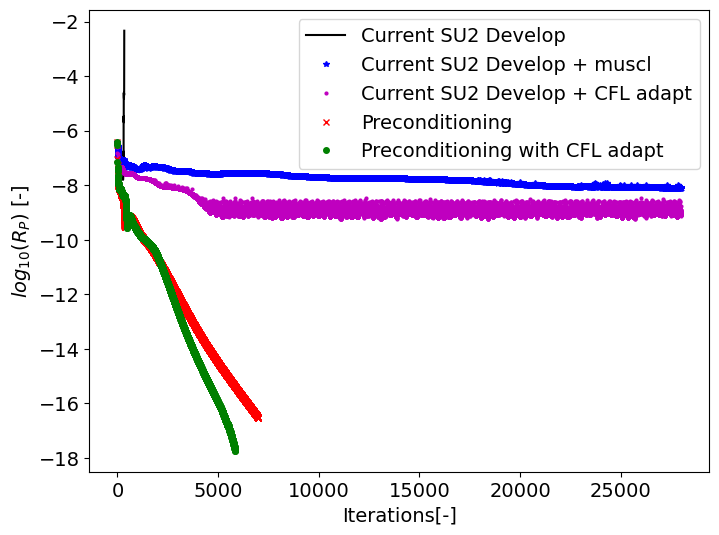

In [22]:
loop_plot(plots, **plot_config)

$\textbf{Second example}$: Plot comparing convergence rate

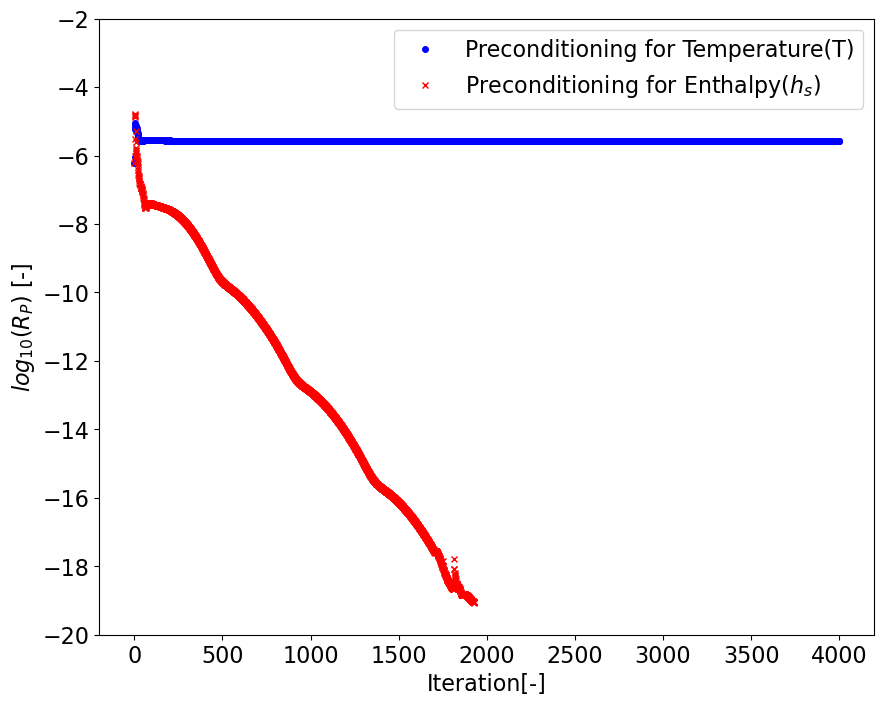

In [25]:
# first we obtain the data that we want to plot
# getting the path to the data that we want to plot
path=getcwd()+"/codes/TestCases/species_transport/passive_transport_validation/"
# get data that is going to be plot in the x-axis
x_1=pd.read_csv(path+"develop/active_scalar/history.csv", usecols=["Inner_Iter"]).values[0:4000]
x_2=pd.read_csv(path+"preconditioning/active_scalar/history.csv", usecols=["Inner_Iter"]).values
# get data that is goint to be plot in the y-axis
y_1=pd.read_csv(path+"develop/active_scalar/history.csv", usecols=['     "rms[P]"     ']).values[0:4000]
y_2=pd.read_csv(path+"preconditioning/active_scalar/history.csv", usecols=['     "rms[P]"     ']).values
# define labels for each plots
title_1 = "Preconditioning for Temperature(T)"#"Current SU2 Develop"
title_2 = "Preconditioning for Enthalpy($h_{s}$)"
# introduce x and y axis labels
xlabel='Iteration[-]'
ylabel= "$log_{10}(R_{P})$ [-]"
# define markers for each plot
marker_1= 'bo'
marker_2= 'rx'
# define figure name, figure, marker and font sizes
figure_name='pressure_develop_vs_preconditioning'
figure_size=(10,8)
marker_size = 4
font_size = 16
# gather previous definitions in list
x=[x_1,x_2]
y=[y_1,y_2]
markers=[marker_1,marker_2]
titles=[title_1,title_2]
# zip data, markers and titles
plots=zip(x,y,markers,titles)
# define y-limits (optional)
ylimits=[-20,-2]
# define plot configuration string
plot_config= {'xlabel': xlabel, 'ylabel': ylabel, 'marker_size': marker_size,\
              'figure_size': figure_size,'font_size': font_size, 'save_figure': 'yes',\
              'figure_name': figure_name, 'y_limits': ylimits}
# create and plot the data
loop_plot(plots, **plot_config)

$\textbf{Third example}$: Plotting Finite Difference (FD) gradient vs Discrete Adjoint(DA) gradients

Define function for retrieving and computing FD gradients

In [29]:
def compute_gradient_validation(path, FD_step = None):
    DAvals_specVar = pd.read_csv(path+"/3__gradient-validation/DOE/DOT/of_grad.csv").values
    FDvals = pd.read_csv(path+"/3__gradient-validation/doe.csv").values[:,1]
    if FD_step is None:
        FD_step=10**-8
    FDGradVals = []
    error_abs = []
    error_rel = []
    for i in range(0,FDvals.size - 1):
        FDGradVals.append((FDvals[i] - FDvals[FDvals.size - 1])/FD_step)
        error_abs.append(abs(FDGradVals[i] -  DAvals_specVar[i][0]))
        error_rel.append(100*abs(FDGradVals[i] -  DAvals_specVar[i][0])/abs(DAvals_specVar[i][0]))
    return FDGradVals, DAvals_specVar, error_abs, error_rel

In [31]:
fluid_mixture = compute_gradient_validation(getcwd()+"/codes/TestCases/species_transport/adjoint/Tutorials/fluid_mixture_2", 10**-8)
fluid_cantera = compute_gradient_validation(getcwd()+"/codes/TestCases/species_transport/adjoint/Tutorials/fluid_cantera_species_combustion_2", 10**-8)

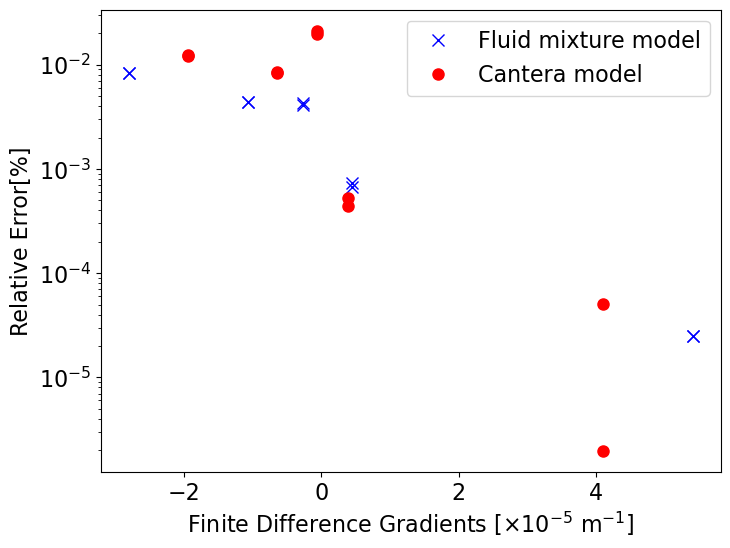

In [33]:
# scale the data that is going to be plot in the x-axis
x_1=[10**5*x for x in fluid_mixture[0]]
x_2=[10**5*x for x in fluid_cantera[0]]
# get data that is going to be plot in the y-axis
y_1=fluid_mixture[3]
y_2=fluid_cantera[3]
# define labels for each plots
title_1 = "Fluid mixture model"
title_2 = "Cantera model"
# introduce x and y axis labels
xlabel=r'Finite Difference Gradients [$\times 10^{-5}\ \mathrm{m}^{-1}$]'
ylabel= "Relative Error[%]"
# define markers for each plot
marker_1= 'bx'
marker_2= 'ro'
# define figure name, figure, marker and font sizes
figure_name='FD vs DA gradients'
figure_size=(8,6)
marker_size = 8
font_size = 16
# gather previous definitions in list
x=[x_1,x_2]
y=[y_1,y_2]
markers=[marker_1, marker_2]
titles=[title_1,title_2]
# zip data, markers and titles
plots=zip(x,y,markers,titles)
# def y_scale, in this case log-scale
y_scale='log'
# define plot configuration string
plot_config = {'xlabel': xlabel, 'ylabel': ylabel, 'marker_size': marker_size,\
               'figure_size': figure_size,'font_size': font_size, 'save_figure': 'yes',\
               'figure_name': figure_name, 'y_scale': y_scale}
# create and plot the data
loop_plot(plots, **plot_config)

$\textbf{Fourth example}$

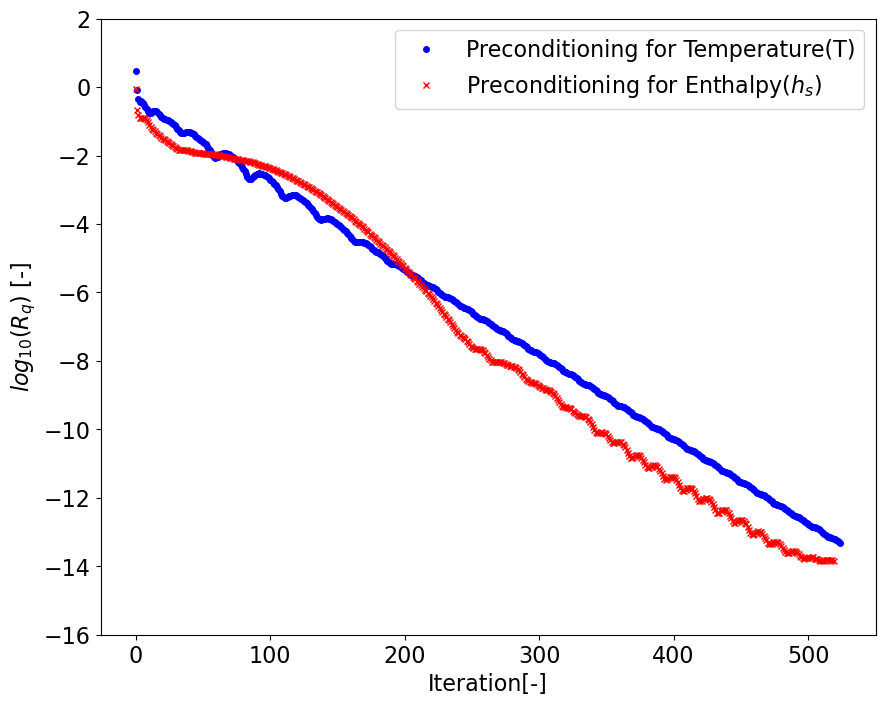

In [36]:
# first we obtain the data that we want to plot
# getting the path to the data that we want to plot
path=getcwd()+"/codes/TestCases/species_transport/passive_transport_validation/"
# get data that is going to be plot in the x-axis
x_1=pd.read_csv(path+"develop/passive_scalar/history.csv", usecols=["Inner_Iter"]).values
x_2=pd.read_csv(path+"preconditioning/passive_scalar/history.csv", usecols=["Inner_Iter"]).values
# get data that is goint to be plot in the y-axis
y_1=pd.read_csv(path+"develop/passive_scalar/history.csv", usecols=['     "rms[T]"     ']).values
y_2=pd.read_csv(path+"preconditioning/passive_scalar/history.csv", usecols=['     "rms[h]"     ']).values
# define labels for each plots
title_1 = "Preconditioning for Temperature(T)"
title_2 = "Preconditioning for Enthalpy($h_{s}$)"
# introduce x and y axis labels
xlabel='Iteration[-]'
ylabel= "$log_{10}(R_{q})$ [-]"
# define markers for each plot
marker_1= 'bo'
marker_2= 'rx'
# define figure name, figure, marker and font sizes
figure_name='T_vs_H_preconditioning'
figure_size=(10,8)
marker_size = 4
font_size = 16
# gather previous definitions in list
x=[x_1,x_2]
y=[y_1,y_2]
markers=[marker_1,marker_2]
titles=[title_1,title_2]
# zip data, markers and titles
plots=zip(x,y,markers,titles)
# define y-limits (optional)
ylimits=[-16,2]
# define plot configuration string
plot_config= {'xlabel': xlabel, 'ylabel': ylabel, 'marker_size': marker_size,\
              'figure_size': figure_size,'font_size': font_size, 'save_figure': 'yes',\
              'figure_name': figure_name, 'y_limits': ylimits}
# create and plot the data
loop_plot(plots, **plot_config)

$\textbf{Fith example}$

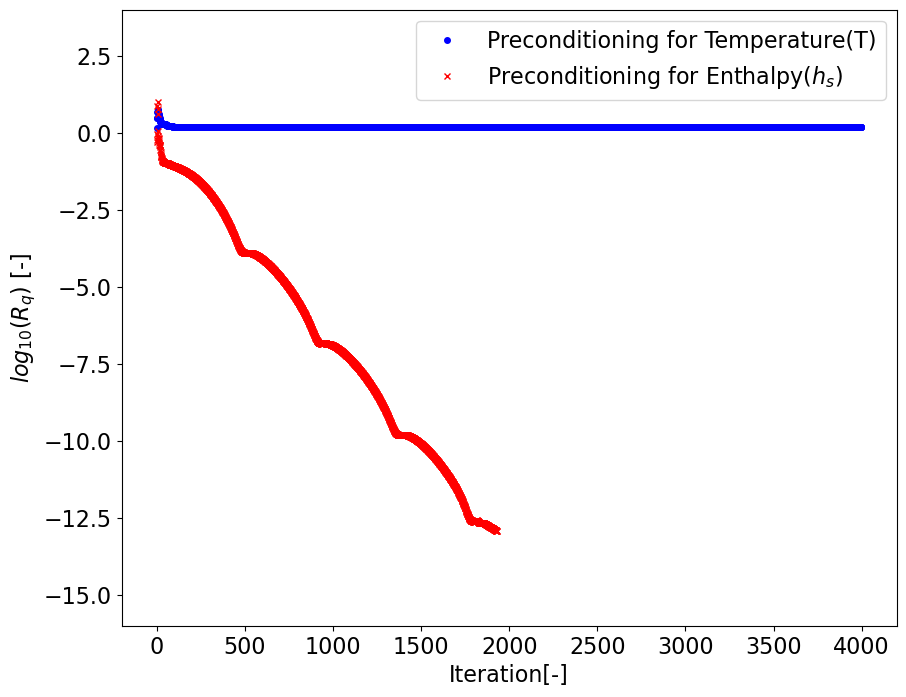

In [39]:
# first we obtain the data that we want to plot
# getting the path to the data that we want to plot
path=getcwd()+"/codes/TestCases/species_transport/passive_transport_validation/"
# get data that is going to be plot in the x-axis
x_1=pd.read_csv(path+"develop/active_scalar/history.csv", usecols=["Inner_Iter"]).values[0:4000]
x_2=pd.read_csv(path+"preconditioning/active_scalar/history.csv", usecols=["Inner_Iter"]).values
# get data that is goint to be plot in the y-axis
y_1=pd.read_csv(path+"develop/active_scalar/history.csv", usecols=['     "rms[T]"     ']).values[0:4000]
y_2=pd.read_csv(path+"preconditioning/active_scalar/history.csv", usecols=['     "rms[h]"     ']).values
# define labels for each plots
title_1 = "Preconditioning for Temperature(T)"
title_2 = "Preconditioning for Enthalpy($h_{s}$)"
# introduce x and y axis labels
xlabel='Iteration[-]'
ylabel= "$log_{10}(R_{q})$ [-]"
# define markers for each plot
marker_1= 'bo'
marker_2= 'rx'
# define figure name, figure, marker and font sizes
figure_name='T_develop_vs_H_preconditioning'
figure_size=(10,8)
marker_size = 4
font_size = 16
# gather previous definitions in list
x=[x_1,x_2]
y=[y_1,y_2]
markers=[marker_1,marker_2]
titles=[title_1,title_2]
# zip data, markers and titles
plots=zip(x,y,markers,titles)
# define y-limits (optional)
ylimits=[-16,4]
# define plot configuration string
plot_config= {'xlabel': xlabel, 'ylabel': ylabel, 'marker_size': marker_size,\
              'figure_size': figure_size,'font_size': font_size, 'save_figure': 'yes',\
              'figure_name': figure_name, 'y_limits': ylimits}
# create and plot the data
loop_plot(plots, **plot_config)

$\textbf{Sixth example}$

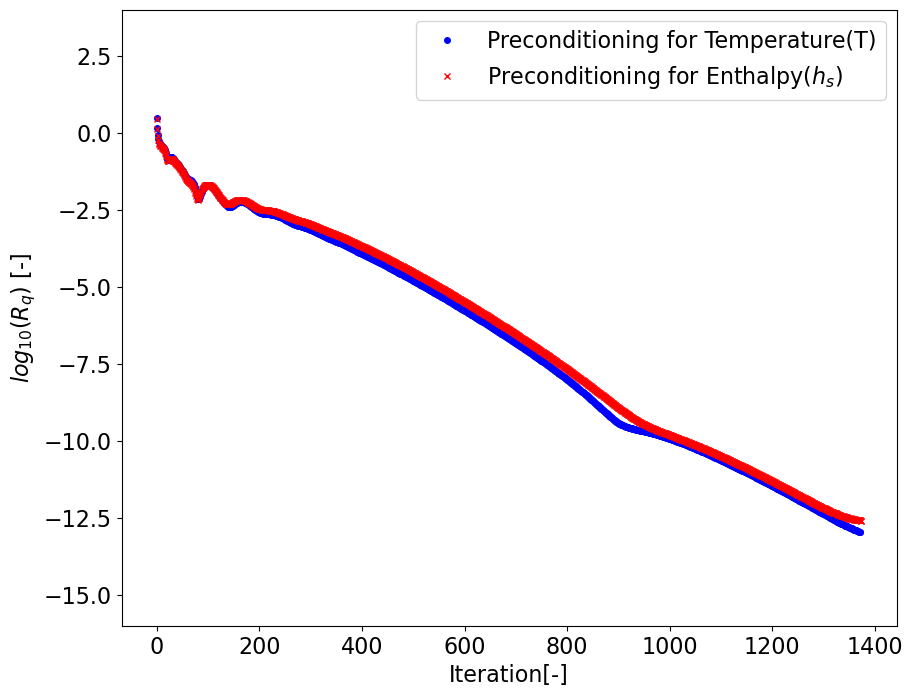

In [42]:
# first we obtain the data that we want to plot
# getting the path to the data that we want to plot
path=getcwd()+"/codes/TestCases/species_transport/passive_transport_validation/"
# get data that is going to be plot in the x-axis
x_1=pd.read_csv(path+"develop/Cp_T/history.csv", usecols=["Inner_Iter"]).values
x_2=pd.read_csv(path+"preconditioning/Cp_T/history.csv", usecols=["Inner_Iter"]).values
# get data that is going to be plot in the y-axis
y_1=pd.read_csv(path+"develop/Cp_T/history.csv", usecols=['     "rms[T]"     ']).values
y_2=pd.read_csv(path+"preconditioning/Cp_T/history.csv", usecols=['     "rms[h]"     ']).values
# define labels for each plots
title_1 = "Preconditioning for Temperature(T)"
title_2 = "Preconditioning for Enthalpy($h_{s}$)"
# introduce x and y axis labels
xlabel='Iteration[-]'
ylabel= "$log_{10}(R_{q})$ [-]"
# define markers for each plot
marker_1= 'bo'
marker_2= 'rx'
# define figure name, figure, marker and font sizes
figure_name='T_develop_vs_H_preconditioning_Cp'
figure_size=(10,8)
marker_size = 4
font_size = 16
# gather previous definitions in lists
x=[x_1,x_2]
y=[y_1,y_2]
markers=[marker_1,marker_2]
titles=[title_1,title_2]
# zip data, markers and titles
plots=zip(x,y,markers,titles)
# define y-limits (optional)
ylimits=[-16,4]
# define plot configuration string
plot_config= {'xlabel': xlabel, 'ylabel': ylabel, 'marker_size': marker_size,\
              'figure_size': figure_size,'font_size': font_size, 'save_figure': 'yes',\
              'figure_name': figure_name, 'y_limits': ylimits}
# create and plot the data
loop_plot(plots, **plot_config)

$\textbf{Seventh example}$

Define function for computing Cp <br>
inputs: Cp_Coeff: list of nasa coefficients <br>
        W: molecular weight gas in kg/mol <br>
        R: universal gas constant

In [46]:
def Cp(T,Cp_Coeff, W):
    Cp=0.0
    for i in range(0,len(Cp_Coeff)-2):
        Cp+=Cp_Coeff[i]*T**i
    return Cp*8.314/W

In [48]:
temperatures=[i for i in range(300,1010,10)]

In [50]:
Cp_Coeff = [2.34433112, 7.98052075e-03, -1.9478151e-05, 2.01572094e-08, -7.37611761e-12, -917.935173, 0.683010238]

In [52]:
Cp_list=[Cp(T,Cp_Coeff, 2.016/1000) for T in temperatures]
print(max(Cp_list),min(Cp_list))

14961.045721845245 14310.10899410016


<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_17324/3921665066.py:5: SyntaxWarning: invalid escape sequence '\c'
  ylabel= "$c_{p}$ [J/(kg$\cdot$K]"


<Axes: xlabel='T[K]', ylabel='$c_{p}$ [J/(kg$\\cdot$K]'>

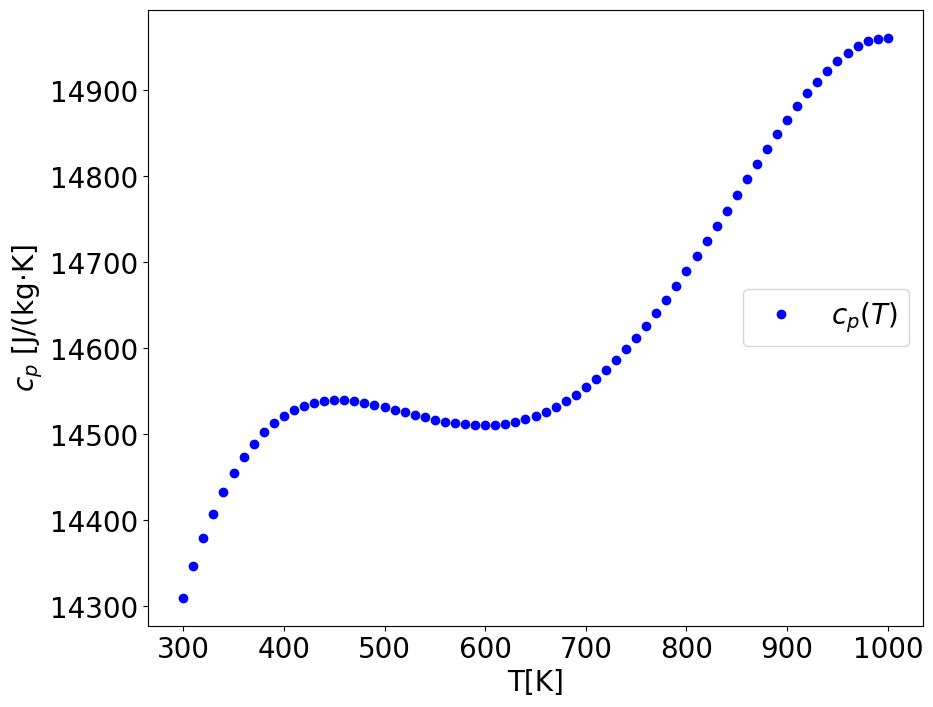

In [54]:
# define labels for each plots
title_1 = "$c_{p}(T)$"
# introduce x and y axis labels
xlabel="T[K]"
ylabel= "$c_{p}$ [J/(kg$\cdot$K]"
# define markers for each plot
marker_1= 'bo'
# define figure name, figure, marker and font sizes
figure_name="Cp_vs_T"
figure_size=(10,8)
marker_size = 6
font_size = 20
legend_location = 'center right'
# define plot configuration string
# create and plot the data
plot_conf = {'title': title_1, 'xlabel':xlabel, 'ylabel': ylabel,\
             'marker': marker_1, 'marker_size': marker_size, 'figure_size': figure_size,\
             'font_size': font_size,'save_figure': 'yes','figure_name': figure_name, 'legend_location':legend_location}
plot_function(temperatures,Cp_list, **plot_conf)